**Persiapan Dataset**

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d 'sriramr/fruits-fresh-and-rotten-for-classification'

100% 3.56G/3.58G [00:43<00:00, 175MB/s]
100% 3.58G/3.58G [00:43<00:00, 87.6MB/s]


In [4]:
import zipfile
dataset_zip = zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [5]:
base_dir = '/content/dataset/dataset'

In [6]:
train_dir = '/content/dataset/dataset/train'
test_dir = '/content/dataset/dataset/test'

**Melihat Dataset**

In [7]:
import os
total_test = 0

for i in os.listdir(test_dir):
  total_test += len(os.listdir(test_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(test_dir+'/'+ i)))

print(total_test)

Total File  freshoranges = 388
Total File  rottenoranges = 403
Total File  freshbanana = 381
Total File  rottenbanana = 530
Total File  rottenapples = 601
Total File  freshapples = 395
2698


In [8]:
total_train = 0

for i in os.listdir(train_dir):
  total_train += len(os.listdir(train_dir+'/'+i))
  print('Total File ', i, '=', len(os.listdir(train_dir+'/'+ i)))

print(total_train)

Total File  freshoranges = 1466
Total File  rottenoranges = 1595
Total File  freshbanana = 1581
Total File  rottenbanana = 2224
Total File  rottenapples = 2342
Total File  freshapples = 1693
10901


In [9]:
total = 0
total = total_test + total_train
print('Total dataset = ', total)

Total dataset =  13599


In [10]:
os.listdir(test_dir)

['freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenbanana',
 'rottenapples',
 'freshapples']

In [11]:
os.listdir(train_dir)

['freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenbanana',
 'rottenapples',
 'freshapples']

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [13]:
def view_random_image (target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran gambar : {img.shape}")
  return img

Ukuran gambar : (384, 420, 3)


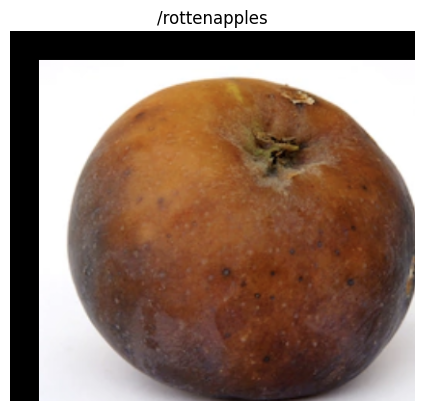

In [14]:
img = view_random_image (train_dir, '/rottenapples')

**Model**

In [15]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
train_data_rf = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 15,
    target_size = (150,150),
    class_mode = "categorical"
)
val_data_rf = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 15,
    target_size = (150,150),
    class_mode = "categorical"
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [22]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adamax',
    metrics=['accuracy']
)

In [23]:
hist = model.fit(
    train_data_rf,
    epochs = 15,
    validation_data=val_data_rf
)

Epoch 1/15
727/727 [==============================] - 456s 624ms/step - loss: 1.0333 - accuracy: 0.6029 - val_loss: 0.5959 - val_accuracy: 0.7980
Epoch 2/15
727/727 [==============================] - 457s 629ms/step - loss: 0.6962 - accuracy: 0.7550 - val_loss: 0.4408 - val_accuracy: 0.8551
Epoch 3/15
727/727 [==============================] - 443s 609ms/step - loss: 0.6070 - accuracy: 0.7844 - val_loss: 0.3992 - val_accuracy: 0.8706
Epoch 4/15
727/727 [==============================] - 459s 631ms/step - loss: 0.5398 - accuracy: 0.8059 - val_loss: 0.2946 - val_accuracy: 0.8907
Epoch 5/15
727/727 [==============================] - 463s 637ms/step - loss: 0.4749 - accuracy: 0.8286 - val_loss: 0.3277 - val_accuracy: 0.8855
Epoch 6/15
727/727 [==============================] - 464s 638ms/step - loss: 0.4433 - accuracy: 0.8408 - val_loss: 0.3856 - val_accuracy: 0.8725
Epoch 7/15
727/727 [==============================] - 466s 640ms/step - loss: 0.4105 - accuracy: 0.8505 - val_loss: 0.2721 -

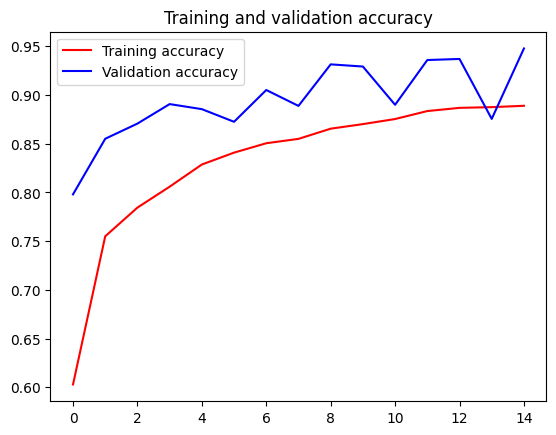

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Plot the results
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [31]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)
  if arr[0][0]==1:
    labels='Fresh Apples'
  elif arr[0][1]==1:
    labels='Fresh Banana'
  elif arr[0][2]==1:
    labels='Fresh Oranges'
  elif arr[0][3]==1:
    labels='Rotten Apples'
  elif arr[0][4]==1:
    labels='Rotten Banana'
  elif arr[0][5]==1:
    labels='Rotten Oranges'
print('{} is a {}'.format(fn,labels))

Saving apel busuk2.jpg to apel busuk2.jpg
1/1 [==============================] - 0s 32ms/step
apel busuk2.jpg is a Rotten Oranges


In [32]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>